In [40]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys, os

from lammpsrun import LAMMPS, Prism

from ase import Atoms, units
from ase.visualize import view
from ase.io.trajectory import Trajectory
from ase.io import write, read
from ase.neighborlist import neighbor_list
from ase.build import surface
from ase.spacegroup import crystal

homepath = "D:\\Cloud Storage\\GitRepositories\\LAMMPS_Simulation\\"
hpc_path = "G:\\home\\LAMMPS_Simulation\\HPC_Jupyter\\"
ephemeral_path = "G:\\ephemeral\\"
print(homepath + '\n' + hpc_path)

D:\Cloud Storage\GitRepositories\LAMMPS_Simulation\
G:\home\LAMMPS_Simulation\HPC_Jupyter\


# Converting to ASE Trajectory

In [41]:
# xyz file
siderite_te_fd = os.path.join(hpc_path, "siderite", "thermal_expansion")
siderite = read(os.path.join(siderite_te_fd, "siderite_te.extxyz"))
siderite.calc = LAMMPS()

In [73]:
outdir = os.path.join(ephemeral_path, "2388249.cx1")

In [74]:
siderite.calc.read_lammps_log(os.path.join(outdir, "log.lammps"))
siderite_thermo = pd.DataFrame(siderite.calc.thermo_content)
siderite_thermo.step = siderite_thermo.step.astype(int)
siderite_thermo.set_index("step", inplace=True)

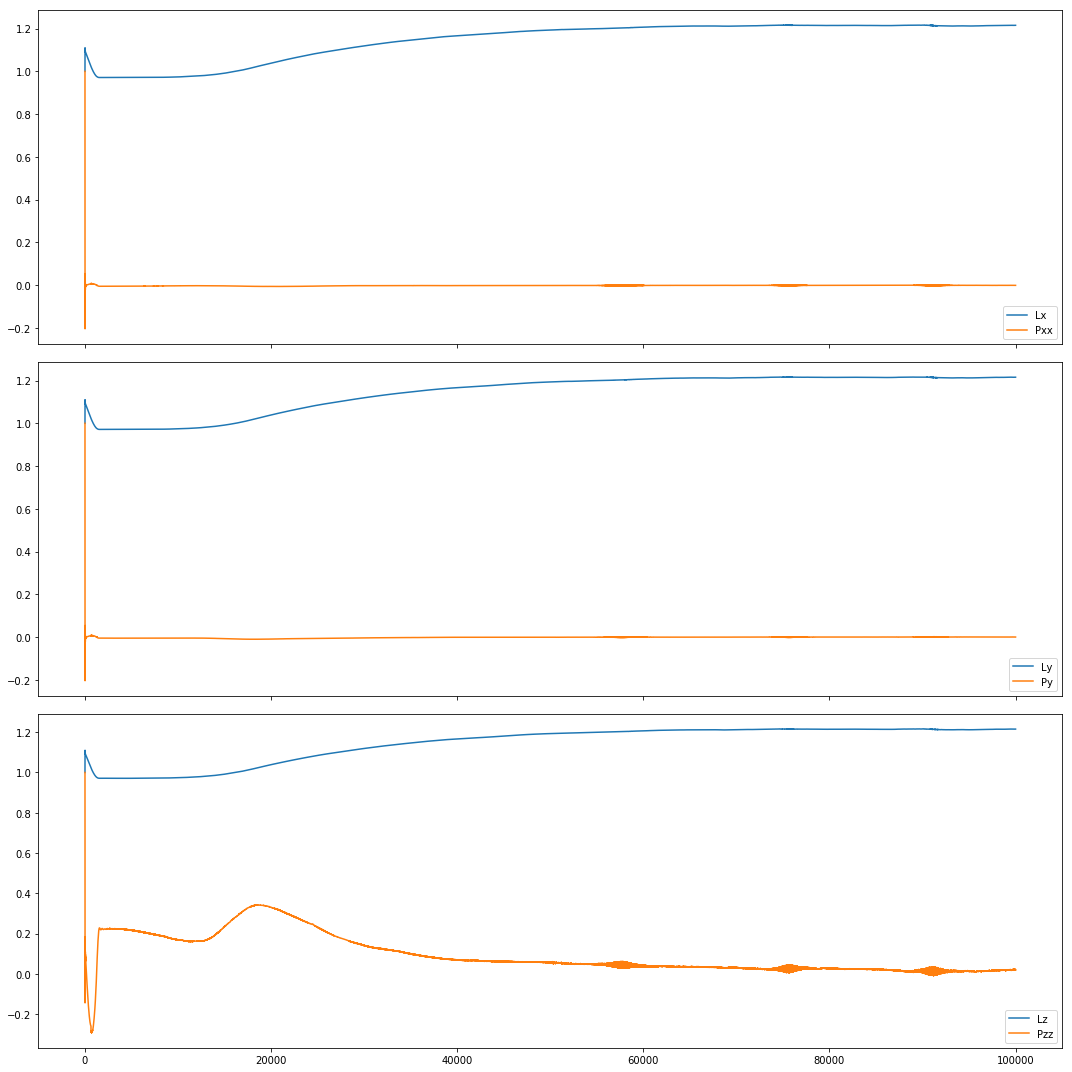

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,15))
ax1.plot(siderite_thermo.index, np.array(siderite_thermo.lx)/siderite_thermo.lx[0], label = 'Lx')
ax1.plot(siderite_thermo.index, np.array(siderite_thermo.pxx)/siderite_thermo.pxx[0], label = 'Pxx')
ax1.legend()

ax2.plot(siderite_thermo.index, np.array(siderite_thermo.ly)/siderite_thermo.ly[0], label = 'Ly')
ax2.plot(siderite_thermo.index, np.array(siderite_thermo.pyy)/siderite_thermo.pyy[0], label = 'Py')
ax2.legend()

ax3.plot(siderite_thermo.index, np.array(siderite_thermo.lz)/siderite_thermo.lz[0], label = 'Lz')
ax3.plot(siderite_thermo.index, np.array(siderite_thermo.pzz)/siderite_thermo.pzz[0], label = 'Pzz')
ax3.legend()

plt.tight_layout()
plt.show()

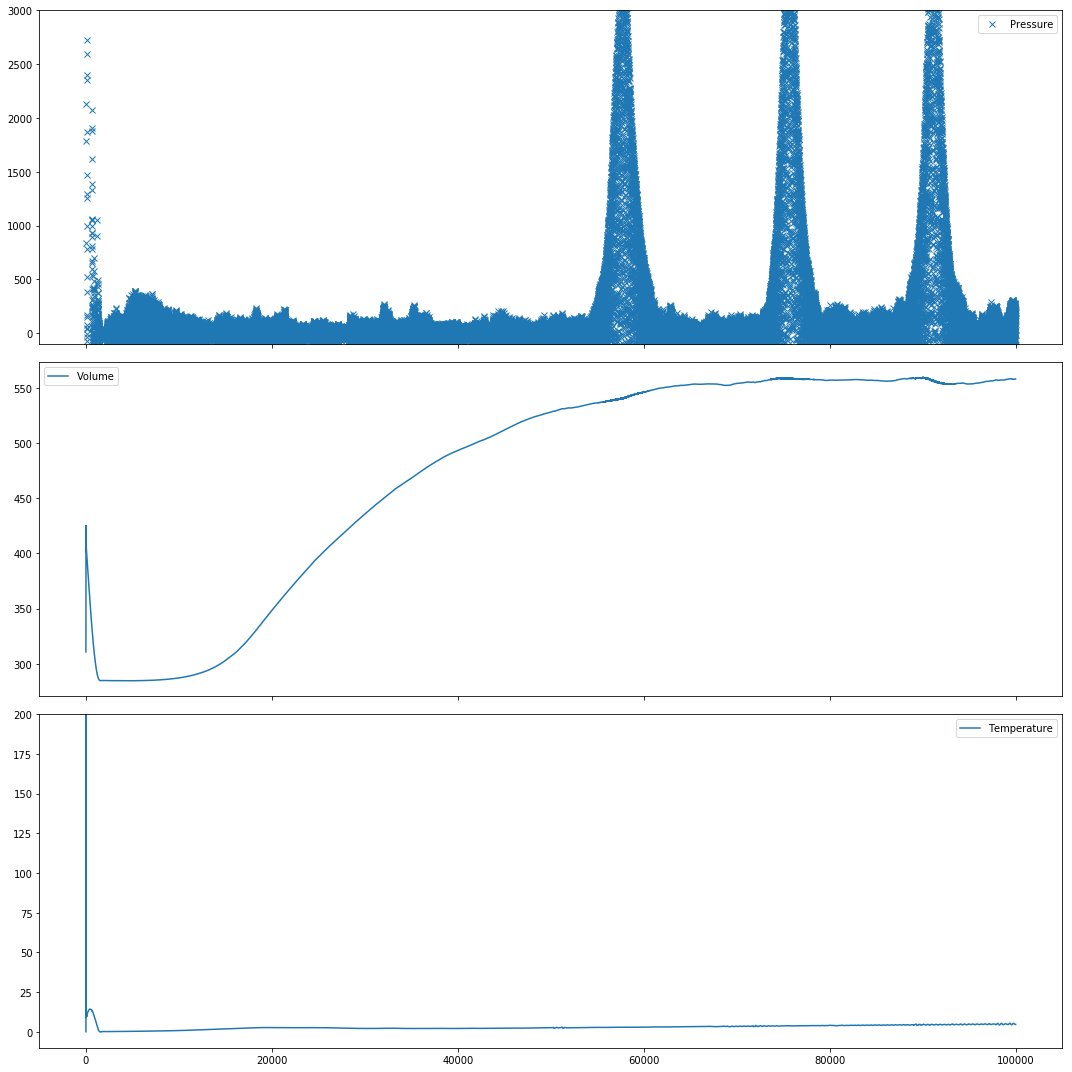

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,15))
ax1.plot(siderite_thermo.index, siderite_thermo.press, ' x', label = 'Pressure')
ax1.set_ylim(-100, 3000)
ax1.legend()

ax2.plot(siderite_thermo.index, siderite_thermo.vol/9, label = 'Volume')
ax2.legend()

ax3.plot(siderite_thermo.index, siderite_thermo.temp, label = 'Temperature')
ax3.set_ylim(-10, 200)
ax3.legend()

plt.tight_layout()
plt.show()

In [88]:
siderite_traj = Trajectory(os.path.join(outdir, "lammps.traj"), 'w')
siderite.calc.trajectory_out = siderite_traj
siderite.calc.read_lammps_trj(os.path.join(outdir, "siderite_te_5K_1atm.lammpstrj"))

In [89]:
siderite_traj.close()
siderite_traj = Trajectory(os.path.join(outdir, "lammps.traj"), 'r')

In [109]:
from ase.spacegroup import get_spacegroup
for t in siderite_traj:
    t.set_pbc([True, True, True])
    sg = get_spacegroup(t, symprec = 0.5)
    print(sg.no, sg.symbol)

167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c
167 R -3 c

1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 

1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 

1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 1
1 P 